Check Example Image 0
[[35 35 33 ... 23 22 22]
 [35 34 33 ... 24 23 23]
 [34 33 32 ... 25 24 24]
 ...
 [18 19 20 ... 41 41 41]
 [18 19 21 ... 41 41 40]
 [19 20 21 ... 40 40 40]]
[[29 30 32 ... 23 22 22]
 [29 30 32 ... 23 22 22]
 [29 30 32 ... 23 22 22]
 ...
 [23 24 26 ... 46 47 48]
 [23 24 26 ... 46 46 46]
 [24 25 26 ... 45 45 45]]
[[29 30 32 ... 22 23 24]
 [30 31 32 ... 23 22 22]
 [30 31 32 ... 23 22 21]
 ...
 [23 24 25 ... 47 47 47]
 [24 24 26 ... 47 47 47]
 [24 25 26 ... 46 48 48]]
[[28 29 31 ... 23 22 21]
 [29 30 31 ... 23 22 21]
 [30 30 31 ... 23 22 21]
 ...
 [24 25 26 ... 47 48 48]
 [25 25 26 ... 46 47 47]
 [26 26 27 ... 45 45 45]]
[[30 30 32 ... 23 22 22]
 [29 30 31 ... 22 22 22]
 [29 30 31 ... 22 21 21]
 ...
 [24 25 26 ... 47 48 48]
 [25 26 27 ... 46 47 47]
 [26 27 28 ... 45 46 46]]
[[28 30 32 ... 23 22 21]
 [30 31 33 ... 23 22 21]
 [32 32 33 ... 22 21 20]
 ...
 [25 25 26 ... 46 47 49]
 [25 25 26 ... 45 47 48]
 [25 26 26 ... 44 46 47]]
[[29 30 31 ... 21 21 21]
 [30 30 31 ... 22

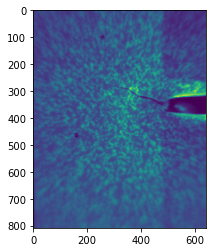

In [10]:
import numpy as np
import pandas as pd
import cv2
import os
import sys
import glob
import matplotlib.pyplot as plt

def load_file(path, flip = 'None'):
    """ 폴더에 들어간 순서대로 이미지 추가 Dict형태 좌우 반전시 flip = 'flip' 사용"""
    files = glob.glob(path+'./*.jpg')
    if not files:
        print("Chck Phath")
        sys.exit()
    img = {}
    count = 0
    for i in files:
        im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        if flip == 'flip':
            im = cv2.flip(im, 1)
        img.setdefault('img%d'%count,im)
        count += 1
    print('Check Example Image 0')
    plt.imshow(img['img0'], cmap='gray')
    return img

##이미지 로드
img = load_file(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC', flip='flip')

for i in img:
    print(img[i])
    plt.imshow(img[i])

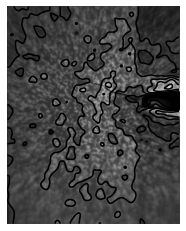

In [63]:
src = img['img8']
plt.imshow(src, cmap='gray')
gas = cv2.GaussianBlur(src,(0,0),10)
plt.axis('off')
plt.contour(gas, colors='black')
plt.savefig(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC'+'/ff3810.png', dpi=300)

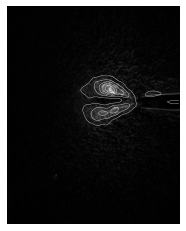

In [92]:
src1 = img['img3']
src2 = img['img2']

dst = cv2.absdiff(src1, src2)
plt.imshow(dst,cmap = 'gray')
gas = cv2.GaussianBlur(dst,(0,0),10)
plt.contour(gas, colors='white', linewidths=0.3)
# plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
# plt.plot(-1*dst[np.where(dst==np.max(dst))[0][0]-10,:]+np.where(dst==np.max(dst))[0][0])
plt.axis('off')
plt.savefig(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC'+'./3302-3301.png',dpi=300)

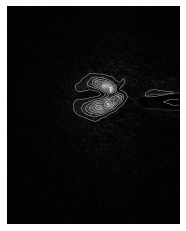

In [93]:
src1 = img['img5']
src2 = img['img4']
dst = cv2.absdiff(src1, src2)
plt.imshow(dst,cmap = 'gray')
# plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
# gas = cv2.GaussianBlur(dst,(0,0), 11)
# plt.contour(gas, colors='black')
gas = cv2.GaussianBlur(dst,(0,0),10)
plt.contour(gas, colors='white', linewidths=0.3)
plt.axis('off')
plt.savefig(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC'+'./3361-3359.png',dpi=300)

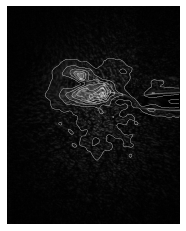

In [94]:
src1 = img['img7']
src2 = img['img6']
dst = cv2.absdiff(src1, src2)
plt.imshow(dst,cmap = 'gray')
# plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
gas = cv2.GaussianBlur(dst,(0,0),10)
plt.contour(gas, colors='white', linewidths=0.3)
plt.axis('off')
plt.savefig(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC'+'./3530-3528.png',dpi=300)

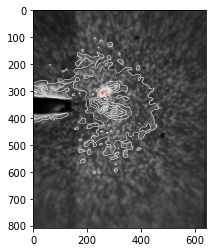

In [233]:
plt.imshow(src1,cmap = 'gray')
plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
gas = cv2.GaussianBlur(dst,(0,0), 5)
plt.contour(gas, [k for k in range(1,int(np.max(gas)),5)],colors='white',  linewidths = 0.5)
plt.savefig('./2.png',dpi=300)

Check Example Image 0


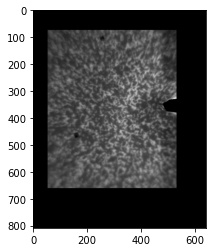

In [4]:
from scipy import io
import fracture
import DIC.DIC as DIC

img = load_file(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC', flip='flip')
src = img['img1']
mask = cv2.imread(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC/1.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.copyTo(src, mask)
plt.imshow(dst,cmap='gray')

mat_path = r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC\3301/'
# uu = io.loadmat(mat_path+'uu.mat')['uu']
# vv = io.loadmat(mat_path+'vv.mat')['vv']
exx = io.loadmat(mat_path+'exx.mat')['exx']
eyy = io.loadmat(mat_path+'eyy.mat')['eyy']
exy = io.loadmat(mat_path+'exy.mat')['exy']
a = DIC.find_zone(mask)

